## <center> D214 - Capstone
<center> Kelseyann Wright 

## SET UP ENVIRONMENT & LOAD DATA

In [1]:
#import basic libraries
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample


In [2]:
#Load and preview the data
dat = pd.read_json("~/Desktop/WGU/D214/jeopardyquestions.json") #load data
dat.info()
dat.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216930 entries, 0 to 216929
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   category     216930 non-null  object
 1   air_date     216930 non-null  object
 2   question     216930 non-null  object
 3   value        213296 non-null  object
 4   answer       216930 non-null  object
 5   round        216930 non-null  object
 6   show_number  216930 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 11.6+ MB


,category,air_date,question,value,answer,round,show_number
0,HISTORY,2004-12-31,"'For the last 8 years of his life, Galileo was...",$200,Copernicus,Jeopardy!,4680
1,ESPN's TOP 10 ALL-TIME ATHLETES,2004-12-31,'No. 2: 1912 Olympian; football star at Carlis...,$200,Jim Thorpe,Jeopardy!,4680
2,EVERYBODY TALKS ABOUT IT...,2004-12-31,'The city of Yuma in this state has a record a...,$200,Arizona,Jeopardy!,4680
3,THE COMPANY LINE,2004-12-31,"'In 1963, live on ""The Art Linkletter Show"", t...",$200,McDonald\'s,Jeopardy!,4680
4,EPITAPHS & TRIBUTES,2004-12-31,"'Signer of the Dec. of Indep., framer of the C...",$200,John Adams,Jeopardy!,4680


## PREPROCESSING

In [3]:

#Check for duplicates and nulls, remove if necessary
print("number of duplicates:", dat.duplicated().sum()) 
print("number of nulls:", dat.isna().sum().sum())
dat.dropna(axis=0, inplace = True) #drop NAs
print('AFTER DROPPING NANs: ')
dat.info()

number of duplicates: 0
number of nulls: 3634
AFTER DROPPING NANs: 
<class 'pandas.core.frame.DataFrame'>
Int64Index: 213296 entries, 0 to 216928
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   category     213296 non-null  object
 1   air_date     213296 non-null  object
 2   question     213296 non-null  object
 3   value        213296 non-null  object
 4   answer       213296 non-null  object
 5   round        213296 non-null  object
 6   show_number  213296 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 13.0+ MB


In [4]:
#remove rows with values not in normal play 
dat['value'] = dat['value'].str.replace(',', '') #remove commas
dat = dat.loc[dat['value'].isin(['$200', '$400', '$600', '$800', '$1000', '$1200', '$1600', '$2000'])] #keep only rows with these values
#create column with numeric values
dat['val_num'] = dat['value'].str.replace('$','').astype(float)

/var/folders/1t/7thx39nx23l6fx52sw3kt8w00000gp/T/ipykernel_18782/2004669739.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  dat['val_num'] = dat['value'].str.replace('$','').astype(float)


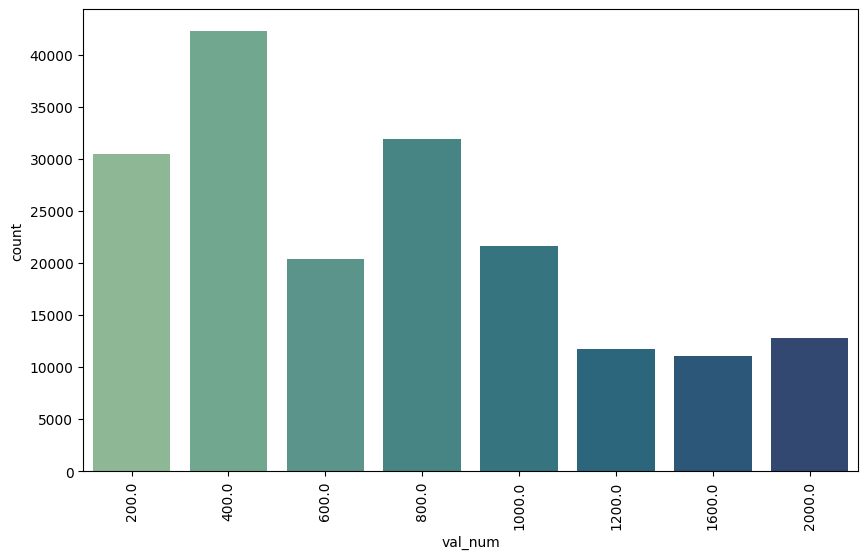

In [6]:
plt.figure(figsize=(10,6))
fig = sns.countplot(data=dat, x='val_num', palette = 'crest') #plot univariate barplot
plt.xticks(rotation = 90)
plt.show()

In [7]:
#BALANCE DATA BY DOWN-SAMPLING LARGER GROUPS
df_bal = pd.DataFrame(columns = dat.columns)
for v in dat['value'].unique():
    df_vals = dat[dat.value == v] #create new dataframe with only thoes values
    df_downsampled = resample(df_vals, replace=False, n_samples=5000, random_state=55) #downsample
    df_bal = pd.concat([df_bal, df_downsampled], ignore_index = True)
    
dat = [] #clear dat out of memory
df_bal.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   category     40000 non-null  object 
 1   air_date     40000 non-null  object 
 2   question     40000 non-null  object 
 3   value        40000 non-null  object 
 4   answer       40000 non-null  object 
 5   round        40000 non-null  object 
 6   show_number  40000 non-null  object 
 7   val_num      40000 non-null  float64
dtypes: float64(1), object(7)
memory usage: 2.4+ MB


In [9]:
df_bal['val_num'].value_counts()

200.0     5000
400.0     5000
600.0     5000
800.0     5000
2000.0    5000
1000.0    5000
1200.0    5000
1600.0    5000
Name: val_num, dtype: int64